# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

### Hypothesis:
1. If the applicant has returned a loan before, they are more likely to get a loan.
2. If the applicant has a higher education level, they are more likely to get a loan.
3. Gender may or may not affect applicants.
4. Applicants with a good credit score are more likely to get a loan.
5. Applicants with high income are more likely to get a loan.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("../data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [5]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

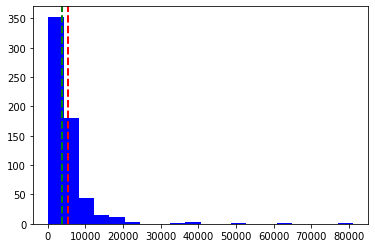

In [6]:
x = df['ApplicantIncome'].values
result = plt.hist(x, bins=20, color='b')
plt.axvline(np.mean(x), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.median(x), color='g', linestyle='dashed', linewidth=2)
plt.show()

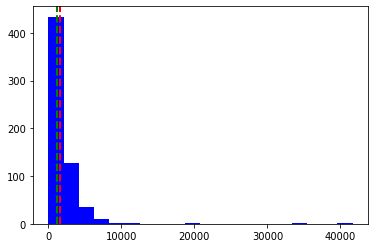

In [7]:
x = df['CoapplicantIncome'].values
result = plt.hist(x, bins=20, color='b')
plt.axvline(np.mean(x), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.median(x), color='g', linestyle='dashed', linewidth=2)
plt.show()

The histogram is right skewed so the mean is more to the right than the mean for both graphs.

In [8]:
df[['ApplicantIncome','CoapplicantIncome']].describe()

,ApplicantIncome,CoapplicantIncome
count,614.000000,614.000000
mean,5403.459283,1621.245798
std,6109.041673,2926.248369
min,150.000000,0.000000
25%,2877.500000,0.000000
50%,3812.500000,1188.500000
75%,5795.000000,2297.250000
max,81000.000000,41667.000000


Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [9]:
df_nominal = df.select_dtypes(include=['object'])
df_nominal

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [10]:
df_nominal.nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [11]:
df_nominal = df_nominal.drop(columns='Loan_ID')
df_nominal

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



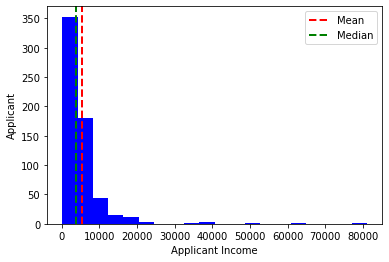

In [12]:
x = df['ApplicantIncome'].values
result = plt.hist(x, bins=20, color='b')
plt.axvline(np.mean(x), color='r', label = 'Mean', linestyle='dashed', linewidth=2)
plt.axvline(np.median(x), color='g', label = 'Median', linestyle='dashed', linewidth=2)
plt.xlabel('Applicant Income')
plt.ylabel('Applicant')
plt.legend()
plt.show()

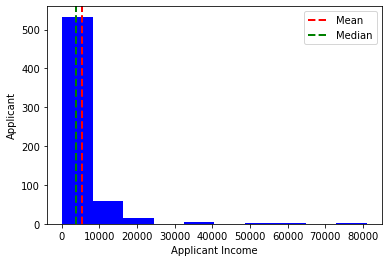

In [13]:
x = df['ApplicantIncome'].values
result = plt.hist(x, bins=10, color='b')
plt.axvline(np.mean(x), color='r', label = 'Mean', linestyle='dashed', linewidth=2)
plt.axvline(np.median(x), color='g', label = 'Median', linestyle='dashed', linewidth=2)
plt.xlabel('Applicant Income')
plt.ylabel('Applicant')
plt.legend()
plt.show()

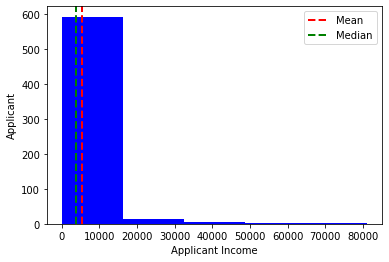

In [14]:
x = df['ApplicantIncome'].values
result = plt.hist(x, bins=5, color='b')
plt.axvline(np.mean(x), color='r', label = 'Mean', linestyle='dashed', linewidth=2)
plt.axvline(np.median(x), color='g', label = 'Median', linestyle='dashed', linewidth=2)
plt.xlabel('Applicant Income')
plt.ylabel('Applicant')
plt.legend()
plt.show()


Look at box plots to understand the distributions. 

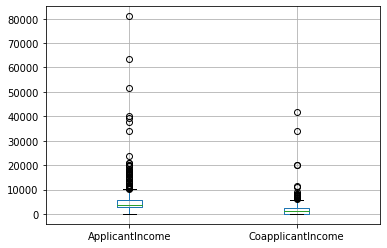

In [15]:
boxplot = df.boxplot(column=['ApplicantIncome', 'CoapplicantIncome']) 

Look at the distribution of income segregated  by `Education`

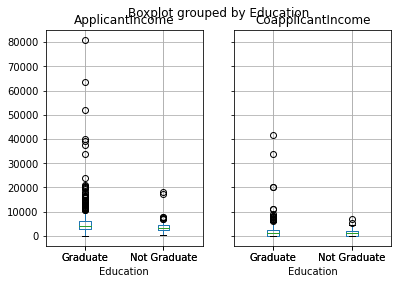

In [16]:
boxplot = df.boxplot(column=['ApplicantIncome', 'CoapplicantIncome'], by='Education') 

Look at the histogram and boxplot of LoanAmount

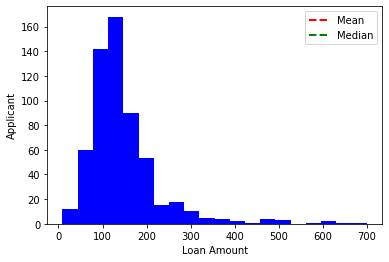

In [17]:
x = df['LoanAmount'].values
result = plt.hist(x, bins=20, color='b')
plt.axvline(np.mean(x), color='r', label = 'Mean', linestyle='dashed', linewidth=2)
plt.axvline(np.median(x), color='g', label = 'Median', linestyle='dashed', linewidth=2)
plt.xlabel('Loan Amount')
plt.ylabel('Applicant')
plt.legend()
plt.show()

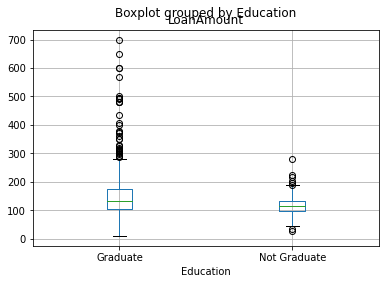

In [18]:
boxplot = df.boxplot(column=['LoanAmount'], by= 'Education') 

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [19]:
df_nominal

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [21]:
# Categorical, use mode.
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
# Categorical, use mode.
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
# Categorical, use mode.
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
# Categorical, use mode.
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
# We have 22 missing Loan Amount and the maximum is much higher than the minimum so median is much better to use than the mean.
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
# We have 14 missing Loan Amount Term, the minimum is very low compared to the mean and maximum so we will use median as well.
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
# Categorical, use mode.
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [22]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

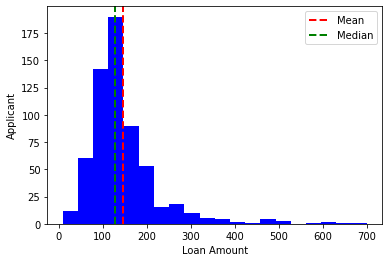

In [23]:
x = df['LoanAmount'].values
result = plt.hist(x, bins=20, color='b')
plt.axvline(np.mean(x), color='r', label = 'Mean', linestyle='dashed', linewidth=2)
plt.axvline(np.median(x), color='g', label = 'Median', linestyle='dashed', linewidth=2)
plt.xlabel('Loan Amount')
plt.ylabel('Applicant')
plt.legend()
plt.show()

In [24]:
df['LogLoanAmount'] = np.log(df['LoanAmount'])

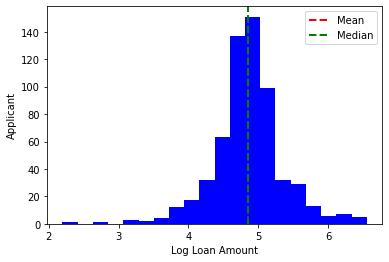

In [25]:
x = df['LogLoanAmount'].values
result = plt.hist(x, bins=20, color='b')
plt.axvline(np.mean(x), color='r', label = 'Mean', linestyle='dashed', linewidth=2)
plt.axvline(np.median(x), color='g', label = 'Median', linestyle='dashed', linewidth=2)
plt.xlabel('Log Loan Amount')
plt.ylabel('Applicant')
plt.legend()
plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [26]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['LogTotalIncome'] = np.log(df['TotalIncome'])

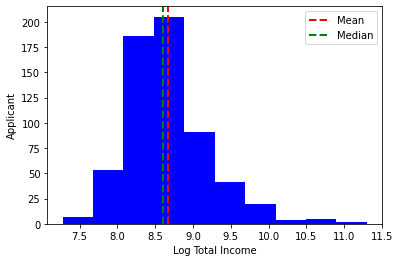

In [27]:
x = df['LogTotalIncome'].values
result = plt.hist(x, bins=10, color='b')
plt.axvline(np.mean(x), color='r', label = 'Mean', linestyle='dashed', linewidth=2)
plt.axvline(np.median(x), color='g', label = 'Median', linestyle='dashed', linewidth=2)
plt.xlabel('Log Total Income')
plt.ylabel('Applicant')
plt.legend()
plt.show()

## 4. Building a Predictive Model

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier

import pickle

In [29]:
df_test = df.copy()

In [30]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LogLoanAmount,TotalIncome,LogTotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


In [31]:
# column_to_move = df_test.pop("Loan_Status")
y = df_test['Loan_Status']

In [32]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LogLoanAmount', 'TotalIncome', 'LogTotalIncome'],
      dtype='object')

In [33]:
#Drop irrelevant columns
df_test.drop(columns=['Loan_ID','LoanAmount', 'TotalIncome', 'Loan_Status'], inplace = True)

In [34]:
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LogLoanAmount,LogTotalIncome
0,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,4.852030,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,4.787492,8.505323
4,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural,4.262680,7.972466
610,Male,Yes,3+,Graduate,No,4106,0.0,180.0,1.0,Rural,3.688879,8.320205
611,Male,Yes,1,Graduate,No,8072,240.0,360.0,1.0,Urban,5.533389,9.025456
612,Male,Yes,2,Graduate,No,7583,0.0,360.0,1.0,Urban,5.231109,8.933664


In [35]:
num_feats = list(df_test.select_dtypes(include=['int','float']))
cat_feats = list(df_test.select_dtypes(include=['object']))

In [36]:
df_num = df_test[num_feats]
df_cat = df_test[cat_feats]

In [37]:
df_num

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LogLoanAmount,LogTotalIncome
0,5849,0.0,360.0,1.0,4.852030,8.674026
1,4583,1508.0,360.0,1.0,4.852030,8.714568
2,3000,0.0,360.0,1.0,4.189655,8.006368
3,2583,2358.0,360.0,1.0,4.787492,8.505323
4,6000,0.0,360.0,1.0,4.948760,8.699515
...,...,...,...,...,...,...
609,2900,0.0,360.0,1.0,4.262680,7.972466
610,4106,0.0,180.0,1.0,3.688879,8.320205
611,8072,240.0,360.0,1.0,5.533389,9.025456
612,7583,0.0,360.0,1.0,5.231109,8.933664


In [38]:
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3+,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [39]:
df_cat = pd.get_dummies(df_cat, columns = cat_feats, drop_first=True)

In [40]:
df_cat

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0
610,1,1,0,0,1,0,0,0,0
611,1,1,1,0,0,0,0,0,1
612,1,1,0,1,0,0,0,0,1


In [41]:
X = df_num.join(df_cat, how='outer')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [43]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
lr = LogisticRegression(max_iter=3000, random_state = 5)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=3000, random_state=5)

In [45]:
y_pred = lr.predict(X_test)
y_true = y_test
print(f'Train accuracy: {np.round(accuracy_score(y_train, lr.predict(X_train)), 2)}')
print(f'Test accuracy: {np.round(accuracy_score(y_true, y_pred), 2)}')

recall = round((recall_score(y_test, y_pred, pos_label = 'Y')*100),2)
precision = round((precision_score(y_test, y_pred, pos_label = 'Y')*100),2)
C = confusion_matrix(y_test, y_pred)

print(f'Recall:\n {recall}%')
print(f'Precision:\n {precision}%')
print(f'Confusion matrix:\n {C}')
print(f'F1:\n {(2*precision*recall)/(precision+recall)}')

Train accuracy: 0.82
Test accuracy: 0.8
Recall:
 96.39%
Precision:
 78.43%
Confusion matrix:
 [[18 22]
 [ 3 80]]
F1:
 86.4874465164169


### The confusion matrix shows 80 is True Positive, 18 is True negative, 22 is False Positive and 3 is False Negative.

Try paramater grid search to improve the results

In [46]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [47]:
logreg = LogisticRegression(max_iter=3000, random_state = 5)
clf = GridSearchCV(logreg,                   
                   param_grid = parameters,  
                   scoring='accuracy',      
                   cv=10,
                   n_jobs = -1,
                   verbose=10,
                   refit=True)             

In [48]:
clf.fit(X_train,y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


C:\Users\Terre\anaconda3\envs\test_env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Terre\anaconda3\envs\test_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terre\anaconda3\envs\test_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Terre\anaconda3\envs\test_env\lib\site-packages\sklearn\linear_model\_logistic.

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=3000, random_state=5),
             n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=10)

In [49]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.8166122448979592


In [50]:
logreg = LogisticRegression(max_iter=3000, random_state = 5, C = 0.01, 
                            penalty = 'l2', 
                            solver = 'liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))

Accuracy: 0.7967479674796748


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [51]:
# df_copypipe = df.copy()
# df_copypipe
df = pd.read_csv("../data/data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [52]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['LogTotalIncome'] = np.log(df['TotalIncome'])
df['LogLoanAmount'] = np.log(df['LoanAmount'])

In [54]:
y = df['Loan_Status']
df.drop(columns=['Loan_ID', 'Loan_Status', 'TotalIncome', 'LoanAmount'], inplace = True)
X = df

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [58]:
lst_num_pipe = list(df.select_dtypes(include=['int','float']))
lst_cat_pipe = list(df.select_dtypes(include=['object']))

In [61]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [73]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [74]:
feature_select = FeatureUnion([('PCA', PCA(n_components=3)), ('select_b', SelectKBest(k=2))])

In [63]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, lst_num_pipe),
        ('cat', categorical_transformer, lst_cat_pipe)])

In [75]:
pipeline = Pipeline(steps=[("preprocesser", preprocessor), ('features', feature_select), ("classifier", LogisticRegression())])
pipeline

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'Loan_Amount_Term',
                                                   'Credit_History',
                                                   'LogTotalIncome',
                                                   'LogLoanAmount']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('features',
                 FeatureUnion(transformer_list=[('PCA', PCA(n_components=3)),
                                                ('select_b',
                                                 SelectKBest(k=2))])),
                ('classifier', LogisticRegression())])

In [69]:
lor = LogisticRegression(max_iter=3000, random_state = 5, C = 0.01, 
                            penalty = 'l2', 
                            solver = 'liblinear')

In [76]:
clf = Pipeline([('preprocessor', preprocessor),
                ('lor',lor)])

In [78]:
pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(score)

0.7967479674796748


In [80]:
param_grid = [
    {
        "classifier__C": [0.1, 1.0, 10.0, 100.0],
        "classifier": [LogisticRegression()]
    }
]

In [81]:
gscv = GridSearchCV(pipeline,                   
                   param_grid = param_grid,  
                   scoring='accuracy',      
                   cv=10,
                   n_jobs = -1,
                   verbose=10,
                   refit=True)  

In [82]:
gscv.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocesser',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'Loan_Amount_Term',
                                                                          'Credit_History',
                                                                          'LogTotalIncome',
                                                                          'LogLoanAmount']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(ha...
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Property_Area'])])),
                                       ('features',
                                        FeatureUnion(transformer_list=[('PCA',
                                                                        PCA(n_components=3)),
                                                                       ('select_b',
                                                                        SelectKBest(k=2))])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': [0.1, 1.0, 10.0, 100.0]}],
             scoring='accuracy', verbose=10)

In [83]:
print(gscv.score(X_test, y_test))

0.7967479674796748


### Same result with the pipeline

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python